<a href="https://colab.research.google.com/github/raj-gupta1/Single-Perceptron-/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
ROOT = "/home/Perceptron.ipynb"

In [59]:
import os
os.chdir(ROOT)
os.getcwd()

'/home/Perceptron.ipynb'

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
plt.style.use("fivethirtyeight")

In [61]:
class Perceptron:
  def __init__(self, eta, epochs, activationFunction):
    self.weights = np.random.randn(3) * 1e-4
    print(f"self.weights: {self.weights}")
    self.eta = eta
    self.epochs = epochs
    self.activationFunction = activationFunction

  def fit(self, X, y):
    self.X = X
    self.y = y
    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] # concactination
    print(f"X_with_bias: \n{X_with_bias}")
    for epoch in range(self.epochs):
      print(f"for epoch: {epoch}")
      y_hat = self.activationFunction(X_with_bias, self.weights)
      print(f"predicted value: \n{y_hat}")
      error = self.y - y_hat
      print(f"error: \n{error}")
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
      print(f"updated weights: \n{self.weights}")
      print("#############\n")

  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
    return self.activationFunction(X_with_bias, self.weights)


In [62]:
activationFunction = lambda inputs,weights: np.where(np.dot(inputs,weights)>0 ,1,0)

#AND

In [63]:
data = {"x1":[0,0,1,1], "x2":[0,1,0,1], "y":[0,0,0,1]}
AND = pd.DataFrame(data)
AND

x1  x2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1

In [64]:
X = AND.drop("y",axis=1)
X

x1  x2
0   0   0
1   0   1
2   1   0
3   1   1

In [65]:
y = AND["y"]
y.to_frame()

y
0  0
1  0
2  0
3  1

In [66]:
model = Perceptron(eta=0.6, epochs=10, activationFunction=activationFunction)

self.weights: [-8.90401451e-05 -9.42269094e-05  2.15138018e-05]


In [67]:
model.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[ 0.59991096  0.59990577 -0.59997849]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[-8.90401451e-05 -9.42269094e-05  1.20002151e+00]
#############

for epoch: 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[0.59991096 0.59990577 0.60002151]
#############

for epoch: 3
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.59991096 0.59990577 0.60002151]
#############

for epoch: 4
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.59991096 0.59990577 0.60002151]
#############

for epoch: 5
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3 

In [68]:
model.predict(X)

array([0, 0, 0, 1])

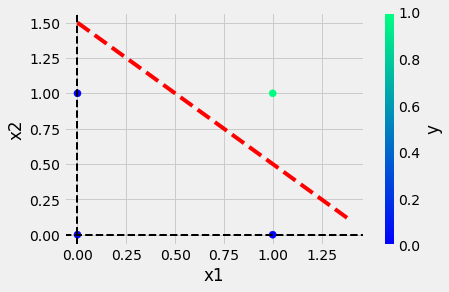

In [69]:
AND.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)
plt.axvline(x=0, color="black", linestyle="--", linewidth=2)

x = np.linspace(0, 1.4) # >>> 50 
y = 1.5 - 1*np.linspace(0, 1.4) # >>> 50 

plt.plot(x, y, "r--")

#XOR


In [70]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,0]}
XOR = pd.DataFrame(data)
XOR

x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0

In [71]:
X = XOR.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

x1  x2
0   0   0
1   0   1
2   1   0
3   1   1

In [72]:
y = XOR['y']
y.to_frame()

y
0  0
1  1
2  1
3  0

In [73]:
model = Perceptron(eta = 0.5, epochs=50, activationFunction=activationFunction)

self.weights: [-1.33316800e-05  6.08300562e-05  1.18211550e-04]


In [74]:
model.fit(X,y)

X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 0.49998667  0.50006083 -0.99988179]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-1.33316800e-05  6.08300562e-05  1.18211550e-04]
#############

for epoch: 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 0.49998667  0.50006083 -0.99988179]
#############

for epoch: 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-1.33316800e-05  6.08300562e-05  1.18211550e-04]
#############

for epoch: 4
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 0.49998667  0.50006083 -0.99988179]
#############

for epoch: 5
predicted value: 
[1 1 1 1]
error: 
0 

In [75]:
model.predict(X)

array([0, 0, 0, 0])

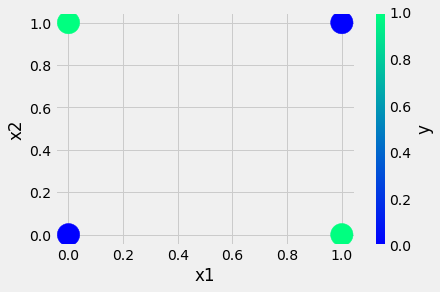

In [76]:
XOR.plot(kind="scatter", x="x1", y="x2", c="y", s=500, cmap="winter")